In [16]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive/')

# Charger les données
data = pd.read_csv("/content/drive//MyDrive/power_consumption_data.csv", sep=",")
data.columns

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [17]:
# Conversion des colonnes 'Date' et 'Time' en un seul datetime
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.set_index('Datetime')
data = data.drop(['Date', 'Time'], axis=1)

In [18]:
# Suppression des lignes avec des valeurs manquantes
data = data.dropna()

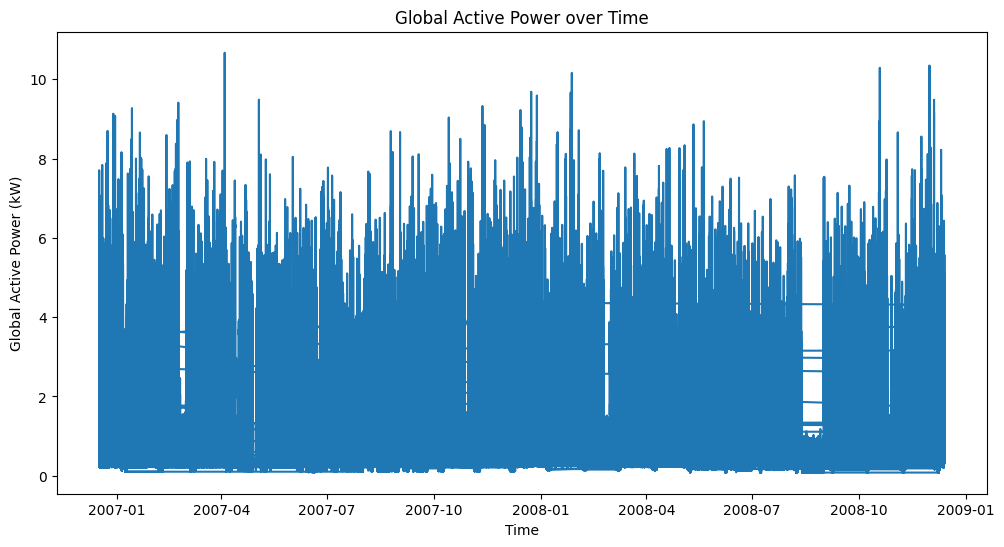

In [23]:
# Visualisation de la puissance active globale en fonction du temps
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Global_active_power'])
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.show()


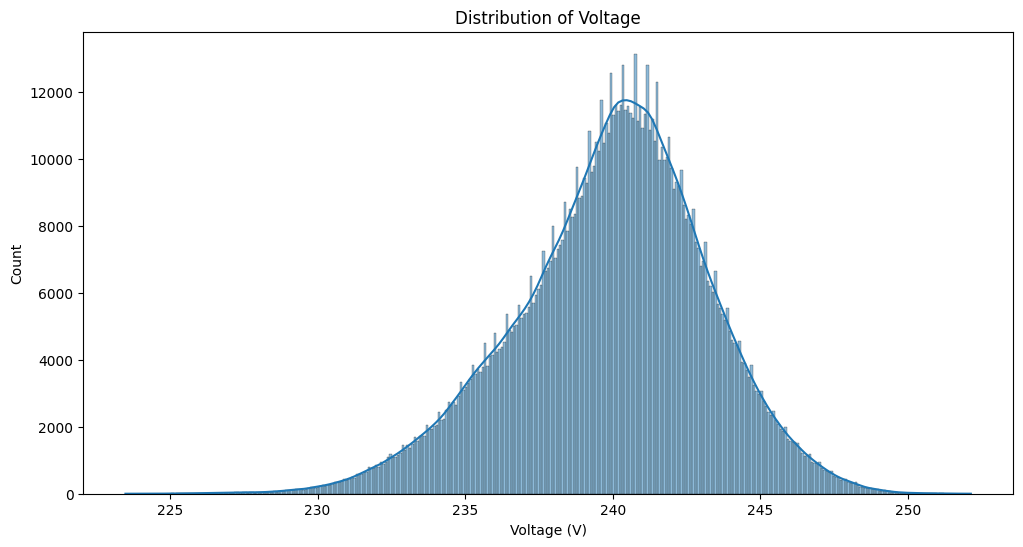

In [20]:
# Visualisation de la répartition de la tension
plt.figure(figsize=(12,6))
sns.histplot(data['Voltage'], kde=True)
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (V)')
plt.show()

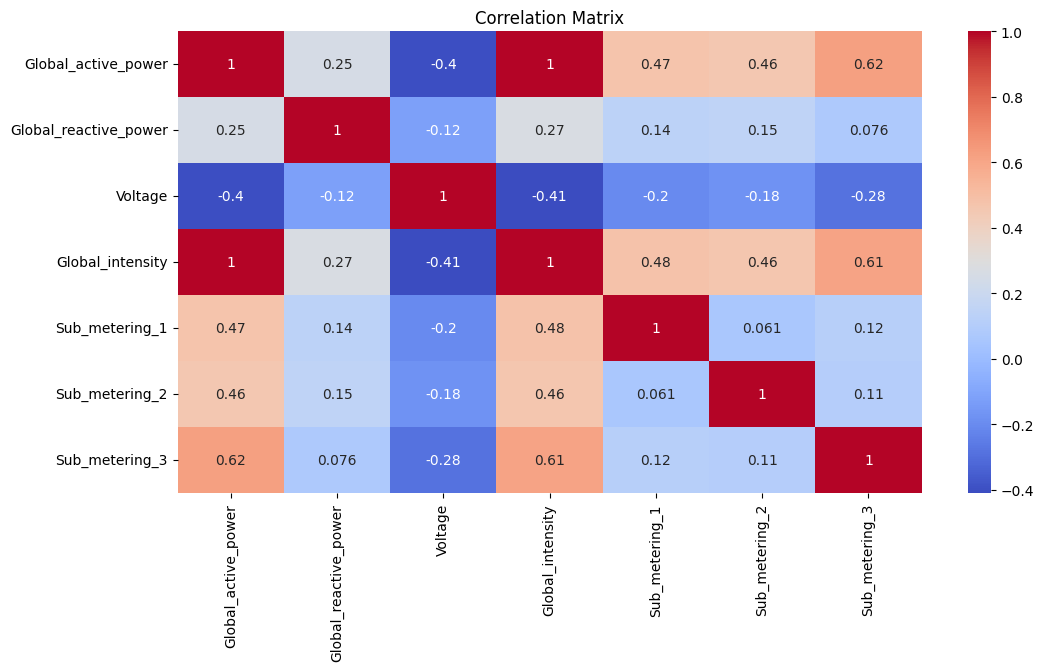

In [21]:
# Visualisation de la corrélation entre les différentes caractéristiques
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Normaliser les données
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data),
                               index=data.index, columns=data.columns)

# Entraîner le modèle d'Isolation Forest
model = IsolationForest(contamination=0.05)  # ajuster le niveau de contamination en fonction de vos besoins
model.fit(data_normalized)

# Prédire les anomalies
data['anomaly'] = model.predict(data_normalized)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})

# Afficher le nombre d'anomalies trouvées
print("Nombre d'anomalies trouvées : ", data['anomaly'].sum())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Nombre d'anomalies trouvées :  52226
